# Genrefy Project

## Exploratory Data Analysis

In [1]:
import mypytable as mpt
import myutils
import myevaluation
import random
import plot_utils as plt
import matplotlib.pyplot as mplt
from myclassifiers import MyKNeighborsClassifier, MySimpleLinearRegressor, MyRandomForestClassifier, MyNaiveBayesClassifier

table = mpt.MyPyTable().load_from_file("tcc_ceds_music.csv")
numrows, numcols = table.get_shape()
print("Rows: ", numrows)
print("Cols: ", numcols)

Rows:  28372
Cols:  29


In [3]:
columns = ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy', 'age']
sum_table = table.compute_summary_statistics(columns)
sum_table.pretty_print()

attribute                         min         max         mid         avg       median
------------------------  -----------  ----------  ----------  ----------  -----------
len                       1            199         100         73.0284     63
dating                    0.000290782    0.647706    0.323998   0.0211116   0.00146199
violence                  0.000284495    0.981781    0.491033   0.118396    0.00250627
world/life                0.000290782    0.962105    0.481198   0.120973    0.00657895
night/time                0.000289185    0.973684    0.486987   0.0573871   0.00194932
shake the audience        0.000284495    0.497463    0.248874   0.0174224   0.0015949
family/gospel             0.000289185    0.545303    0.272796   0.0170454   0.00150376
romantic                  0.000284495    0.940789    0.470537   0.048681    0.00175439
communication             0.000290782    0.645829    0.32306    0.0766798   0.00263158
obscene                   0.000289185    0.992298    

## Distributions

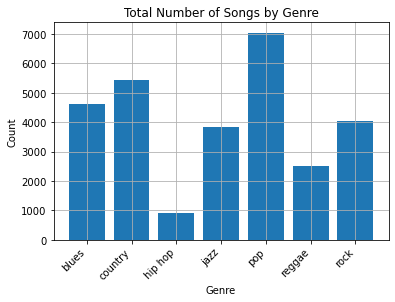

In [24]:
genres = table.get_column('genre')
x, y = myutils.get_value_counts(genres)

title = "Total Number of Songs by Genre"
xlabel = "Genre"
plt.make_frequency_diagram(x, y, title, xlabel)

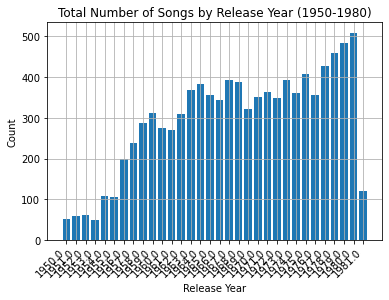

In [25]:
release_dates = table.get_column('release_date')
release_dates.sort()
n = len(release_dates)

x, y = myutils.get_value_counts(release_dates[:n // 3])
title = "Total Number of Songs by Release Year (1950-1980)"
xlabel = "Release Year"
plt.make_frequency_diagram(x, y, title, xlabel)

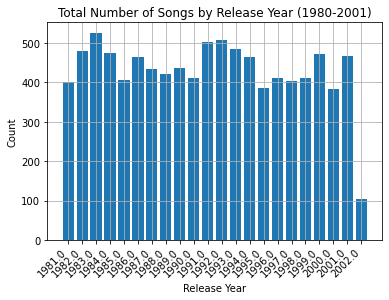

In [26]:
x, y = myutils.get_value_counts(release_dates[n // 3:2 * (n // 3)])
title = "Total Number of Songs by Release Year (1980-2001)"
xlabel = "Release Year"
plt.make_frequency_diagram(x, y, title, xlabel)

1981.0


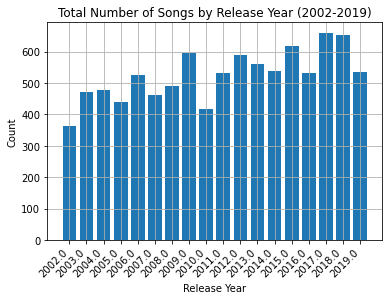

In [27]:
n = len(release_dates)

print(release_dates[n // 3])
x, y = myutils.get_value_counts(release_dates[2 * (n // 3):])
title = "Total Number of Songs by Release Year (2002-2019)"
xlabel = "Release Year"
plt.make_frequency_diagram(x, y, title, xlabel)

## Load the column data

In [6]:
print(table.column_names)
dating_ratings = table.get_column('dating')
violence_ratings = table.get_column('violence')
life_ratings = table.get_column('world/life')
night_ratings = table.get_column('night/time')
shake_ratings = table.get_column('shake the audience')
gospel_ratings = table.get_column('family/gospel')
romance_ratings = table.get_column('romantic')
comm_ratings = table.get_column('communication')
obscene_ratings = table.get_column('obscene')
dance_ratings = table.get_column('danceability')
energy_ratings = table.get_column('energy')

['artist_name', 'track_name', 'release_date', 'genre', 'len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy', 'topic', 'age']


# Linear Regression

## Violence vs. Obscenity

In [3]:
X_train, X_test, y_train, y_test = myevaluation.train_test_split(violence_ratings, obscene_ratings, \
                                                                 test_size=5, shuffle=True)
line_reg = MySimpleLinearRegressor()
line_reg.fit(X_train, y_train)

In [4]:
test_list = []
for i in range(0, len(X_test)):
    test_list.append([X_test[i]])

predictions = line_reg.predict(test_list)
for i in range(0, len(test_list)):
    print("Violence:", X_test[i], "\t Predicted Obscenity Rating:", predictions[i], \
          "\t Actual Obscenity Rating:", y_test[i])

Violence: 0.002192983 	 Predicted Obscenity Rating: 0.11601689659937246 	 Actual Obscenity Rating: 0.002192983
Violence: 0.374897273 	 Predicted Obscenity Rating: 0.055613512685045156 	 Actual Obscenity Rating: 0.004784689
Violence: 0.001814882 	 Predicted Obscenity Rating: 0.1160781746164873 	 Actual Obscenity Rating: 0.001814882
Violence: 0.001879699 	 Predicted Obscenity Rating: 0.11606766986448894 	 Actual Obscenity Rating: 0.001879699
Violence: 0.300705952 	 Predicted Obscenity Rating: 0.06763754075693586 	 Actual Obscenity Rating: 0.001949318


b: 0.11635419846943064
m: -0.1620514704900135


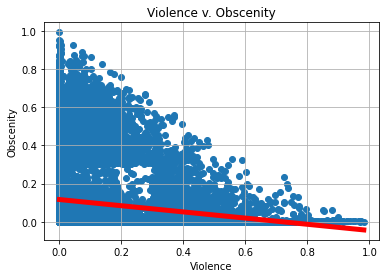

In [5]:
b,m = myutils.calculate_linear_regression(violence_ratings, obscene_ratings)
print("b:", b)
print("m:", m)

mplt.title("Violence v. Obscenity")
mplt.xlabel("Violence")
mplt.ylabel("Obscenity")
mplt.scatter(violence_ratings, obscene_ratings)
mplt.plot([min(violence_ratings), max(violence_ratings)], [m * min(violence_ratings) + b, m * max(violence_ratings) + b],\
          c="r", lw=5);
mplt.grid(True);

## Danceability vs. Energy

In [7]:
X_train, X_test, y_train, y_test = myevaluation.train_test_split(dance_ratings, energy_ratings, \
                                                                 test_size=5, shuffle=True)
line_reg = MySimpleLinearRegressor()
line_reg.fit(X_train, y_train)

test_list = []
for i in range(0, len(X_test)):
    test_list.append([X_test[i]])

predictions = line_reg.predict(test_list)
for i in range(0, len(test_list)):
    print("Danceability:", X_test[i], "\t Predicted Energy Rating:", predictions[i], \
          "\t Actual Energy Rating:", y_test[i])

Danceability: 0.364236976 	 Predicted Energy Rating: 0.5659534831788898 	 Actual Energy Rating: 0.828823483
Danceability: 0.669663165 	 Predicted Energy Rating: 0.5730081178628278 	 Actual Energy Rating: 0.55353961
Danceability: 0.442218131 	 Predicted Energy Rating: 0.567754666510803 	 Actual Energy Rating: 0.604592256
Danceability: 0.235351457 	 Predicted Energy Rating: 0.5629765274189018 	 Actual Energy Rating: 0.763756386
Danceability: 0.599263511 	 Predicted Energy Rating: 0.5713820495729025 	 Actual Energy Rating: 0.528513803


b: 0.5576267751347707
m: 0.022964785661581572


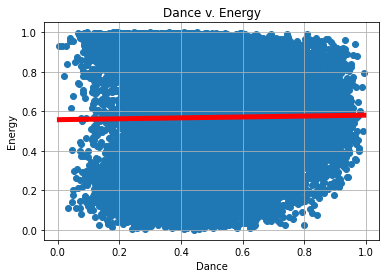

In [8]:
b,m = myutils.calculate_linear_regression(dance_ratings, energy_ratings)
print("b:", b)
print("m:", m)

mplt.title("Dance v. Energy")
mplt.xlabel("Dance")
mplt.ylabel("Energy")
mplt.scatter(dance_ratings, energy_ratings)
mplt.plot([min(dance_ratings), max(dance_ratings)], [m * min(dance_ratings) + b, m * max(dance_ratings) + b],\
          c="r", lw=5);
mplt.grid(True);

## KNN Classifier

In [5]:
k = 3
# X = table.data
X = []
X.append(table.get_column("sadness"))
X.append(table.get_column("feelings"))
X.append(table.get_column("danceability"))
X.append(table.get_column("loudness"))
X.append(table.get_column("acousticness"))
X.append(table.get_column("instrumentalness"))
X.append(table.get_column("valence"))
X.append(table.get_column("energy"))
X = myutils.transpose(X)
print(len(X))
y = table.get_column("genre")
train_folds, test_folds = myevaluation.stratified_kfold_cross_validation(X, y, k)
print(len(train_folds[0]))
print(len(test_folds[0]))

sadness_index = table.column_names.index("sadness")
feelings_index = table.column_names.index("feelings")
danceability_index = table.column_names.index("danceability")
loudness_index = table.column_names.index("loudness")
acousticness_index = table.column_names.index("acousticness")
instrumentalness_index = table.column_names.index("instrumentalness")
valence_index = table.column_names.index("valence")
energy_inidex = table.column_names.index("energy")
genre_index = table.column_names.index("genre")

predictive_accuracies = []
# for i in range(k):
#     train_indices = train_folds[i]
#     test_indices = test_folds[i]

#     train = []
#     y_train = []
#     for index in train_indices:
#         train.append(table.data[index][sadness_index : energy_inidex])
#         y_train.append(table.data[index][genre_index])

#     test = []
#     y_test = []
#     for index in test_indices:
#         test.append([table.data[index][sadness_index : energy_inidex]])
#         y_test.append(table.data[index][genre_index])

train_indices = train_folds[0]
test_indices = test_folds[0][:10]

train = []
y_train = []
for index in train_indices:
    train.append(table.data[index][sadness_index : energy_inidex])
    y_train.append(table.data[index][genre_index])

test = []
y_test = []
for index in test_indices:
    test.append(table.data[index][sadness_index : energy_inidex])
    y_test.append(table.data[index][genre_index])

# run nearest neighbor classification
mykneighbors = MyKNeighborsClassifier(n_neighbors = 3)
MyKNeighborsClassifier.fit(mykneighbors, train, y_train)
predicted = MyKNeighborsClassifier.predict(mykneighbors, test)
print(predicted)

# print results
print("===============================================")
print("STEP 2: k = 5 Nearest Neighbor Classifier")
print("===============================================")
for i, instance in enumerate(test):
    print("instance: ", instance)
    print("class: ", predicted[i], "actual: ", y_test[i])
    print()

28372
18914
9458
[0.001283697, 0.001283697, 0.001283697, 0.001283697, 0.001283697, 0.001283697, 0.001283697, 0.001283697, 0.001283697, 0.001283697]
STEP 2: k = 5 Nearest Neighbor MPG Classifier
instance:  [[0.380298895, 0.117175451, 0.357738547, 0.454118914, 0.997991966, 0.901821862, 0.33944765]]
class:  0.001283697 actual:  pop

instance:  [[0.225889484, 0.001547988, 0.68699231, 0.744404277, 0.083934823, 0.199392713, 0.775350371]]
class:  0.001283697 actual:  pop

instance:  [[0.000482859, 0.123149877, 0.368569262, 0.633694844, 0.435742405, 0.0, 0.282769992]]
class:  0.001283697 actual:  pop

instance:  [[0.63050735, 0.001119821, 0.662081664, 0.643130016, 0.983935727, 0.000175101, 0.744435284]]
class:  0.001283697 actual:  pop

instance:  [[0.000626566, 0.032580842, 0.522365428, 0.528728559, 0.85240949, 0.0, 0.408491344]]
class:  0.001283697 actual:  pop

instance:  [[0.034922425, 0.026084213, 0.636087945, 0.640335359, 0.483935225, 0.791497976, 0.745465787]]
class:  0.001283697 actual